## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [16]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [17]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [18]:
df.shape ## to check rows

(294478, 5)

c. The number of unique users in the dataset.

In [19]:
df.user_id.nunique() ## to get unique users.

290584

d. The proportion of users converted.

In [20]:
df.converted.mean() ## since the values are 1 and 0, the mean in this case is 
## the proportion

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [21]:

## checking wrong intersections. 

df.groupby(["group",'landing_page']).count() 



user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [22]:

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [23]:
df2 = df.query(' (group == "control" and landing_page =="old_page") or (group=="treatment" and landing_page =="new_page") ')

In [24]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [25]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [26]:
## checking for ids that were repeated greater than once.
df2.user_id.value_counts()>1

773192     True
630732    False
811737    False
797392    False
795345    False
801490    False
799443    False
787157    False
793302    False
817882    False
842446    False
815835    False
805596    False
803549    False
809694    False
807647    False
895712    False
840399    False
836301    False
899810    False
834242    False
936604    False
934557    False
940702    False
938655    False
830144    False
828097    False
832195    False
838348    False
821956    False
          ...  
734668    False
736717    False
730574    False
775632    False
771538    False
642451    False
773587    False
783828    False
785877    False
779734    False
781783    False
759256    False
726472    False
748999    False
746950    False
753093    False
751044    False
740803    False
738754    False
744897    False
742848    False
634271    False
632222    False
636316    False
630169    False
650647    False
648598    False
654741    False
652692    False
630836    False
Name: user_id, Length: 2

c. What is the row information for the repeat **user_id**? 

In [27]:
## from b id = 773192
df2[df2["user_id"]==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [75]:
df2=df2.drop_duplicates("user_id")
df2[df2["user_id"]==773192] 

,user_id,timestamp,landing_page,converted,intercept,ab_page,country_UK,country_US,page_UK,page_US
1899,773192,2017-01-09 05:37:58.781806,new_page,0,1,1,0,1,0,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [29]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
group_mean = df2.groupby(["group"],as_index = False).mean() ##grouping by means
group_mean

,group,user_id,converted
0,control,788164.072594,0.120386
1,treatment,787845.719290,0.118808


In [31]:
controlConvP = group_mean.converted[0]
controlConvP

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [32]:
treatConvP = group_mean.converted[1]
treatConvP

0.11880806551510564

d. What is the probability that an individual received the new page?

In [33]:
group_count =df2.groupby('landing_page',as_index=False).count() # grouping by count
group_count

,landing_page,user_id,timestamp,group,converted
0,new_page,145310,145310,145310,145310
1,old_page,145274,145274,145274,145274


In [34]:
group_count.converted[0]/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**No I don't think threse is sufficent result to conclude that the new page is better.**

**if anything the old page has on average more conversiton rate. Not necessarily better than the new page as we don't have evidence that this difference is statistically significant**


**But of course we need to take into consideration change change aversion bias and other considerations.**

**So we can't say for sure if any of the pages preform better with our given information.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0:
**Pnew - Pold <= 0**

H1:
 **Pnew - Pold > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [35]:
#based on assumption
pNew =  df2.converted.mean()
pNew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [36]:
#based on assumption
pOld = df2.converted.mean()
pOld

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [37]:
nNew = df2[df2["group"] == "treatment"].shape[0]
nNew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [38]:
nOld = df2[df2["group"] == "control"].shape[0]
nOld

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [39]:
new_page_converted = np.random.binomial(1, pNew, nNew)


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [40]:
old_page_converted = np.random.binomial(1, pOld, nOld)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [41]:
pDif = new_page_converted.mean() - old_page_converted.mean()
pDif

0.001147475685724042

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [42]:
#bootstrapping 10000 times.
p_diffs = []
for _ in range(10000):
    newConvertMean = np.random.binomial(1, pNew, nNew).mean();
    oldConvertMean = np.random.binomial(1, pOld, nOld).mean();
    pDif = newConvertMean - oldConvertMean
    p_diffs.append(pDif)
    

In [43]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

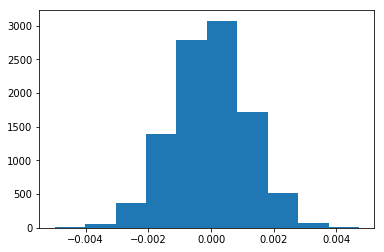

In [44]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [45]:
observedDif = treatConvP - controlConvP  
observedDif

-0.0015782389853555567

In [46]:
p = (p_diffs>observedDif).mean()
p

0.90769999999999995

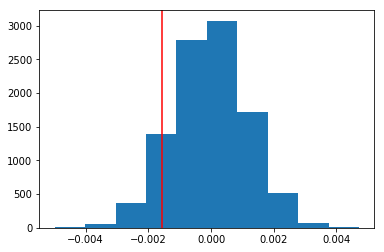

In [47]:

plt.hist(p_diffs);
plt.axvline(observedDif,color = "red");

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j we computed the probabilty of getting the obesreved difference by chance assuming that the null is true. and we got that this value is highley likely with chance of ~90%, which is what we call the p value.**

**We can say with good confidence that we cannot reject the null hypothesis since p value is extremely high.(fail to reject the null hypothesis)**

**this tells us that there isn't a difference between the old page and the new page that's statisticaly signficance with info we are given.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [48]:
import statsmodels.api as sm

convert= df2[df2.converted == 1]
convert_old = convert[convert.group == 'control'].shape[0]
convert_old

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489

In [49]:
convert_new = convert[convert.group == 'treatment'].shape[0]
convert_new

17264

In [50]:
n_old = df2[df2.group == 'control'].shape[0]
n_old

145274

In [51]:
n_new = df2[df2.group == 'treatment'].shape[0]
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [52]:
zStat, pVal = sm.stats.proportions_ztest((convert_new, convert_old), (n_new, n_old), alternative='larger')

zStat

-1.3109241984234394

In [53]:
pVal

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?



**The z-score tells how many standard deviation apart we are from the mean.**
**So the observed difference lies 1.3 standard deviations to the left from the mean in this case**

**The pValue is very high, so again we fail to reject the null hypothesis, infact the pValue we get from the ztest is almost the same as the one we get through 
the bootstrapping method.** 

**So yes they agree with previous findings.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [54]:
df2["intercept"] = 1;

df2 = pd.get_dummies(df2, columns=['group'],drop_first = True) 
#create dummy variable for the column group and drops one of the two. in this
#case drop the control column


In [55]:
df2.rename(columns={'group_treatment':'ab_page'}, inplace=True)

df2.head() ## looks good. 

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [56]:
logit = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        23:37:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [58]:
np.exp(result.params) , 

(intercept    0.136863
 ab_page      0.985123
 dtype: float64,)

In [59]:
1/np.exp(result.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**This is due to the alternative hypotheses being different**

**In the bootstraping method our alternative hypothesis was that the new page is better**

**In the logisitc regression method our alternative hypothesis is that the new page and old are different, regardless if one or the other is better.**

**in this case the P value is less than Part II, but we still fail to reject the null hypothesis in both cases. since 0.19>0.05 if we choose alpha as 0.05**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We could consider the timestap as a factor for converting as this is recorded in the dataset. Seeing whether weekdays differ from weekends, or different time intervals and how they affect the conversion rate,**

**Considering other factos can be good to determine other factors that 
influence converting. it also helps us see the reasons people convert in a new perspective that we haven't thought about.**


**Also considering other factos in our case could be beneficial as the factors we had weren't helpful in telling us whether a user convert or not.**


**One disadvantage would be that the factors we inlcude could be correlated to one another; that is: that indepenedent variables are not really independent.
Which will lead to misleading results**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [60]:
countries = pd.read_csv("countries.csv")
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [61]:
countries.shape

(290584, 2)

In [62]:
df2 = df2.join(countries.set_index('user_id'),on = 'user_id',how='inner')


In [63]:
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0,US


In [64]:
df2.shape

(290584, 7)

In [65]:
df2 = pd.get_dummies(df2,columns=["country"],drop_first = True)


In [66]:
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,country_UK,country_US
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0,0,1


In [67]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'country_UK', 'country_US']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Oct 2019   Pseudo R-squ.:               1.521e-05
Time:                        23:37:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [68]:
np.exp(results.params) ## to get the likelyhood

intercept     0.130350
country_UK    1.052027
country_US    1.041647
dtype: float64

**According to p values for each variable, it appears that users' countries don't play a statistically signficant role on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [69]:
## preforming (boolean AND) on 0,1 columns by multiplication. to get neccessary
## columns
df2["page_UK"] = df2["ab_page"]*df2["country_UK"]
df2["page_US"] = df2["ab_page"]*df2["country_US"] 
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,country_UK,country_US,page_UK,page_US
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0,0,1,0,0


In [70]:
logit = sm.Logit(df2["converted"],df2[["intercept","ab_page","country_UK","country_US","page_UK","page_US"]])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [71]:
np.exp(result.params) ## to get likelyhood

intercept     0.134794
ab_page       0.934776
country_UK    1.011854
country_US    1.017682
page_UK       1.081428
page_US       1.048001
dtype: float64

In [72]:
#summary results.

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 31 Oct 2019   Pseudo R-squ.:               3.482e-05
Time:                        23:37:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
country_UK     0.0118      0.040      0.296      0.767      -0.066       0.090
country_US     0.0175      0.038      0.465      0.642      -0.056       0.091
page_UK        0.0783      0.057      1.378      0.168      -0.033       0.190
page_US        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**It appears that none of the new variables that were studied have an impact on conversion rate that is statistically significant.**




In [73]:
##Wanted to see the time range of our data. 
##To use on conclusion.

pd.to_datetime(df2.timestamp).max() - pd.to_datetime(df2.timestamp).min() 


Timedelta('21 days 23:59:49.081927')

## Conclusion

In A/B test with a null hypothesis that there is no diffrence between old page and the new page, we failed to reject the hypothesis with a p value of ~90%.

With regression we also found no statistcal evidence to support that the new page is better with a p value of ~19%. (difference due to different alternative hypothesis).

Tests were also made on different countries to see that if a particular country had more conversion rate or not and if the interaction with different countries with new page or the old had different conversion rate. turns out that there was no statistcaily significant difference. 


 

If I would give a recommendation to the company regarding whether to use the old page or the new page with the informaiton we are given. I would suggest first that run the test longer if possible, cause factors like change aversion
and novelty effect could plays a bigger factor in shorter tests. This data we had were collected in a 21 day span.   


if it isn't possible to run the test longer, I would suggest that they keep the old page because we found no statistical evidence that the new page preforms better with a vraitey of different tests over different factors.

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0